In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
full_data = pd.read_csv(r'05_07_21_5CB_Blanked')

wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]
full_spectra = full_data[wavelength_columns]
full_data

,5CB concentration wtf,ethanol concentration wtf,water concentration wtf,5CB amount mass g,5CB amount volume uL,ethanol amount mass g,ethanol amount volume uL,water amount mass g,water amount volume uL,5CB-ethanol-stock amount volume uL,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,0.00000,0.100000,0.900000,0.00000,0.000000,0.100000,126.694539,0.900000,900.000000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.00025,0.100000,0.899750,0.00025,0.247525,0.100000,126.694539,0.899750,899.750000,100.0,...,0.515,0.507,0.498,0.489,0.480,0.472,0.463,0.455,0.447,0.440
2,0.00000,0.177778,0.822222,0.00000,0.000000,0.177778,225.234737,0.822222,822.222222,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.00025,0.177778,0.821972,0.00025,0.247525,0.177778,225.234737,0.821972,821.972222,100.0,...,0.496,0.487,0.478,0.469,0.461,0.452,0.444,0.437,0.428,0.420
4,0.00050,0.177778,0.821722,0.00050,0.495050,0.177778,225.234737,0.821722,821.722222,200.0,...,1.148,1.132,1.116,1.099,1.084,1.068,1.051,1.037,1.021,1.006
5,0.00000,0.255556,0.744444,0.00000,0.000000,0.255556,323.774934,0.744444,744.444444,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.00025,0.255556,0.744194,0.00025,0.247525,0.255556,323.774934,0.744194,744.194444,100.0,...,0.610,0.602,0.593,0.584,0.575,0.568,0.559,0.551,0.542,0.534
7,0.00050,0.255556,0.743944,0.00050,0.495050,0.255556,323.774934,0.743944,743.944444,200.0,...,1.334,1.321,1.308,1.294,1.281,1.269,1.256,1.243,1.229,1.216
8,0.00075,0.255556,0.743694,0.00075,0.742574,0.255556,323.774934,0.743694,743.694444,300.0,...,1.493,1.479,1.465,1.451,1.435,1.422,1.408,1.394,1.378,1.364
9,0.00000,0.333333,0.666667,0.00000,0.000000,0.333333,422.315132,0.666667,666.666667,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


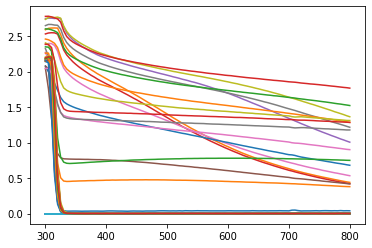

In [9]:
spectras = full_spectra
for i, spec in spectras.iterrows():
    spec = list(spec)
    plt.plot(wavelengths, spec)

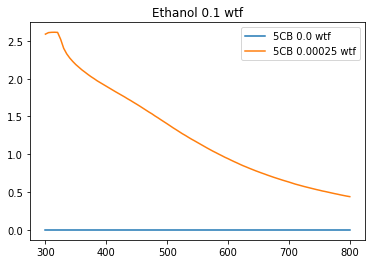

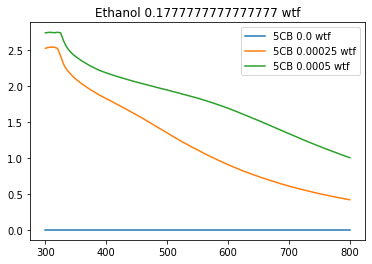

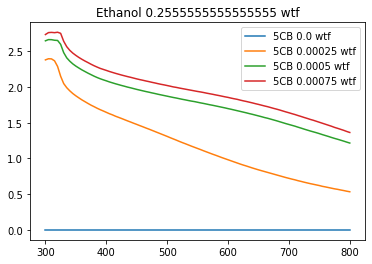

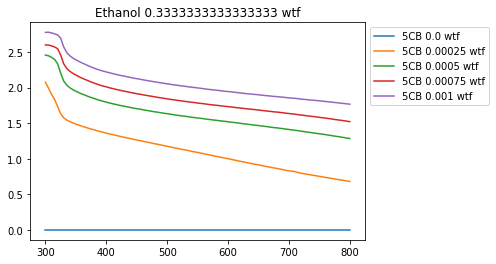

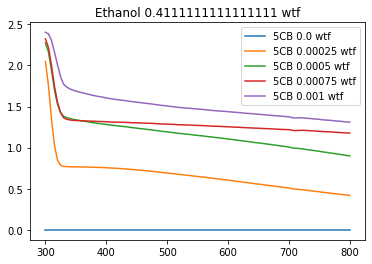

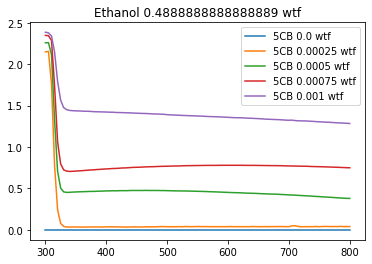

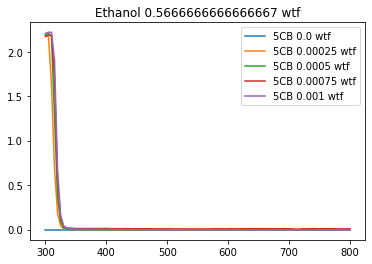

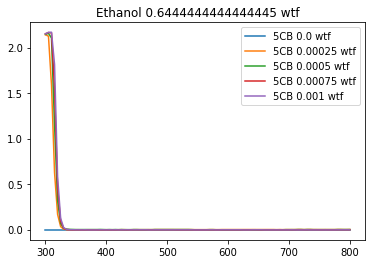

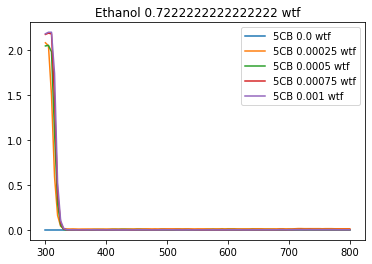

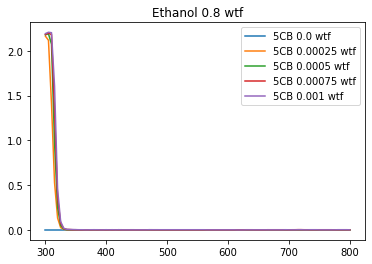

In [10]:
etoh_group = full_data.groupby('ethanol concentration wtf')

for etoh, group in etoh_group:
    fig, ax = plt.subplots()
    ax.set_title('Ethanol ' + str(etoh) + ' wtf')
    for i, row in group.iterrows():
        spectra = list(row[wavelength_columns])
        label = '5CB ' + str(row['5CB concentration wtf']) + ' wtf'
        ax.plot(wavelengths, spectra, label = label)
    ax.legend(bbox_to_anchor=(1, 1))

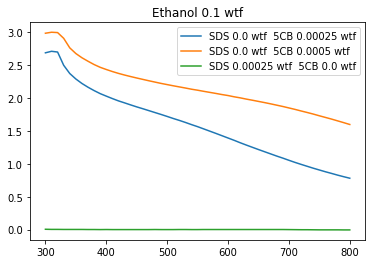

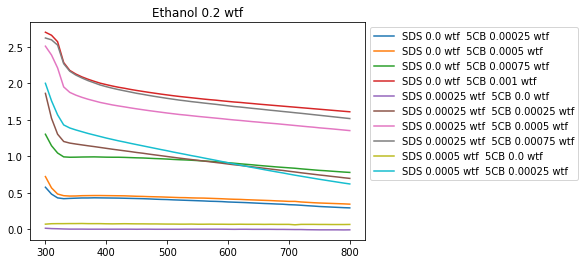

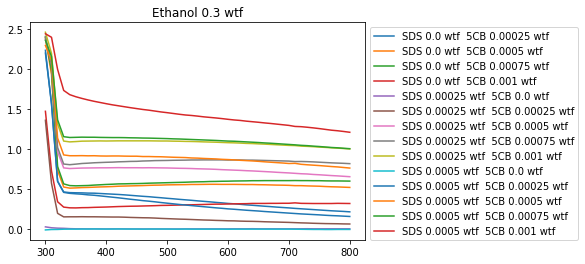

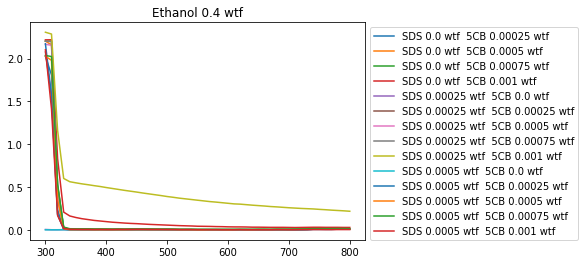

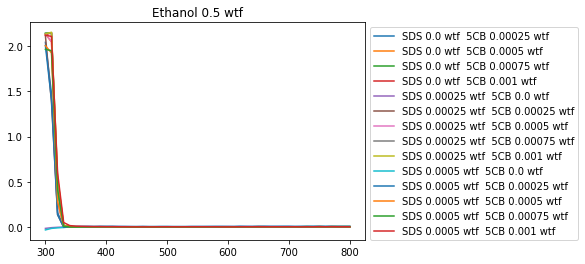

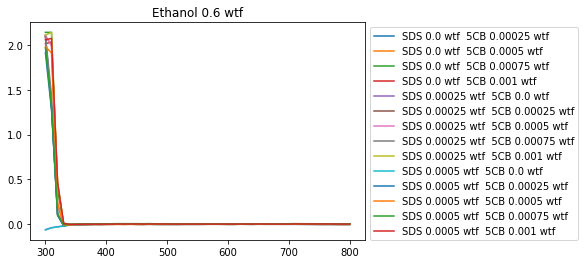

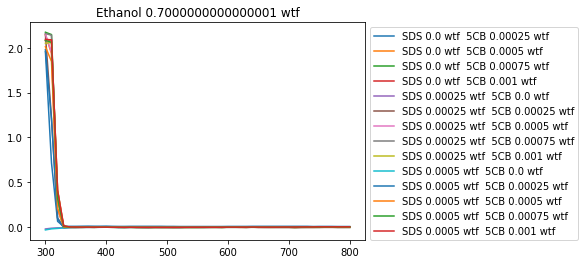

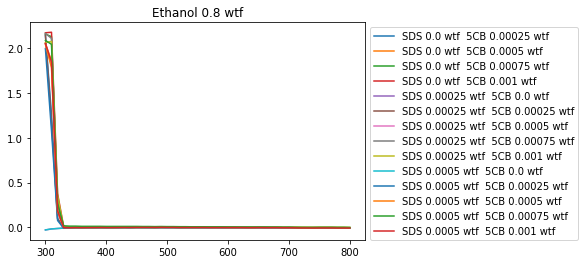

In [4]:
etoh_group = full_data.groupby('ethanol concentration wtf')

for etoh, group in etoh_group:
    fig, ax = plt.subplots()
    ax.set_title('Ethanol ' + str(etoh) + ' wtf')
    for i, row in group.iterrows():
        spectra = list(row[wavelength_columns])
        sds_label = 'SDS ' + str(row['SDS concentration wtf']) + ' wtf' + '  5CB ' + str(row['5CB concentration wtf']) + ' wtf'
        ax.plot(wavelengths, spectra, label = sds_label)
    ax.legend(bbox_to_anchor=(1, 1))

<ipython-input-5-6c1e64b29338>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


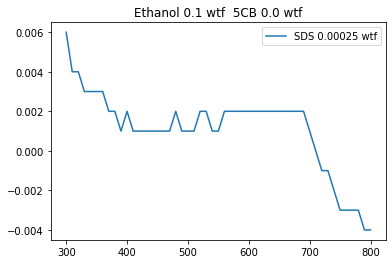

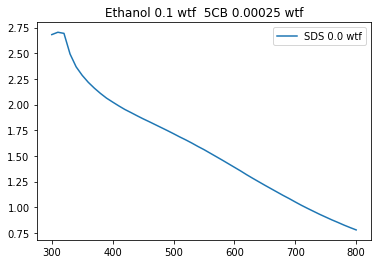

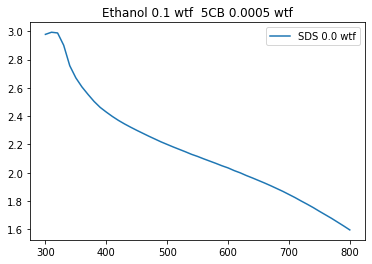

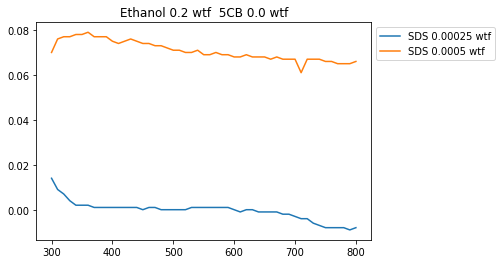

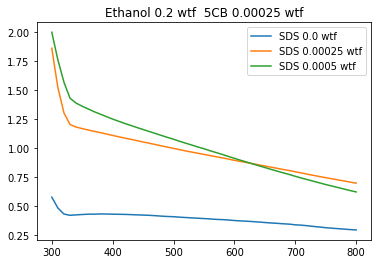

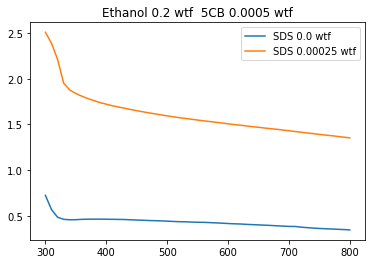

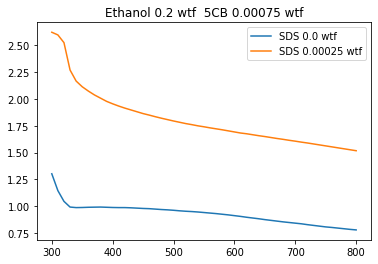

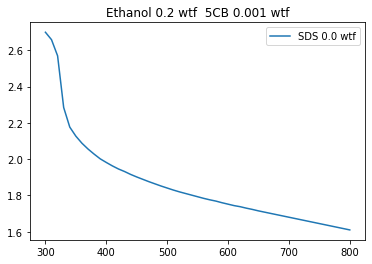

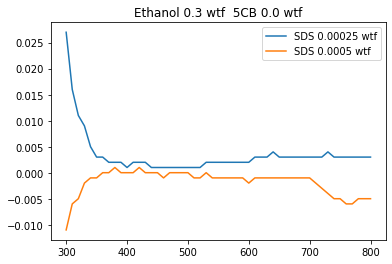

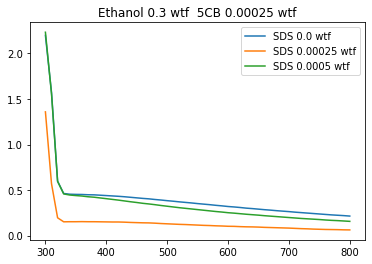

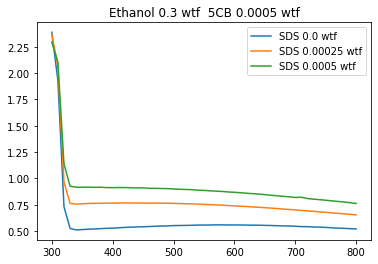

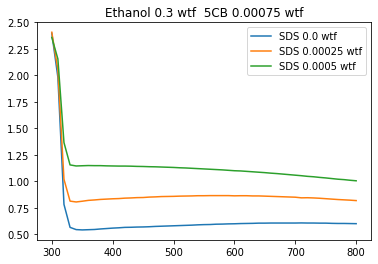

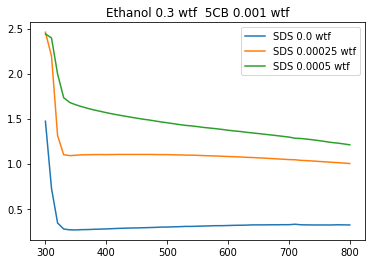

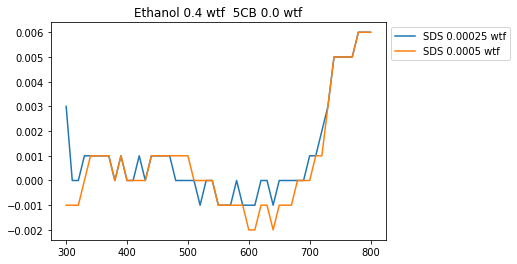

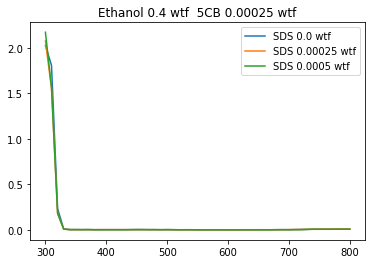

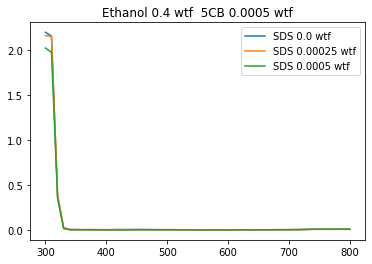

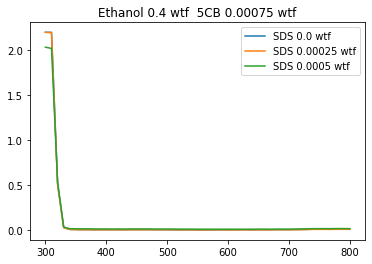

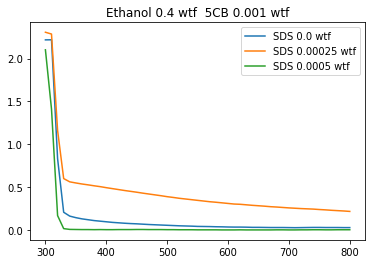

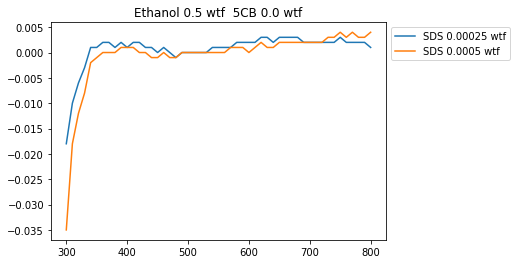

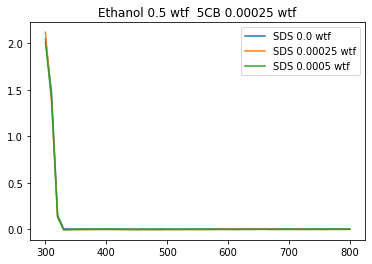

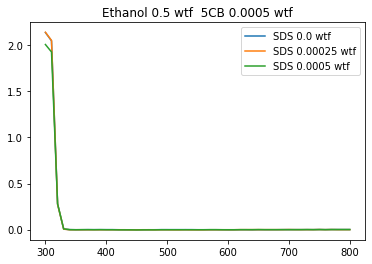

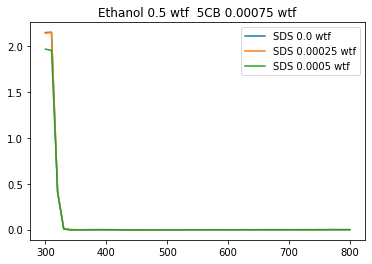

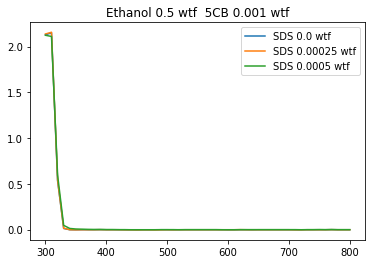

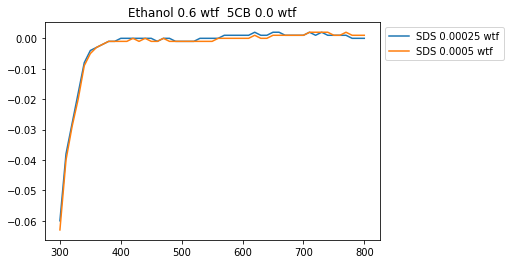

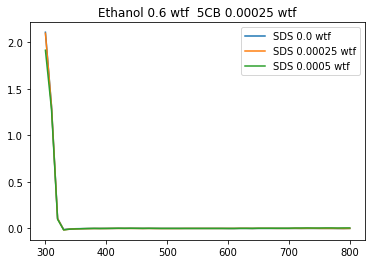

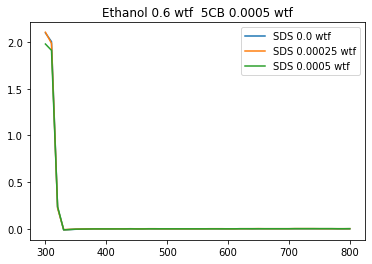

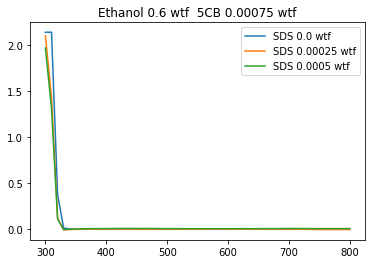

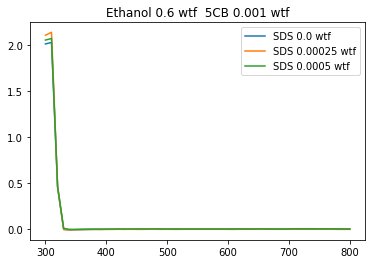

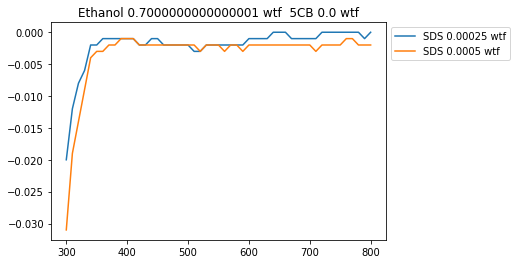

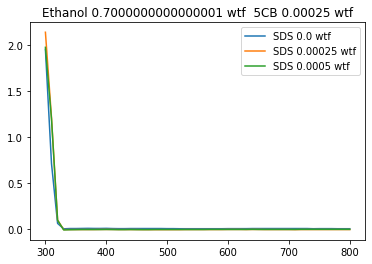

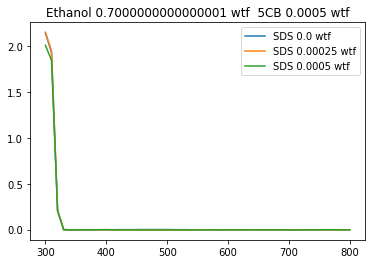

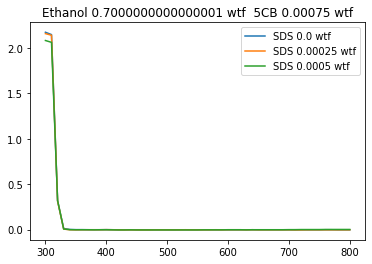

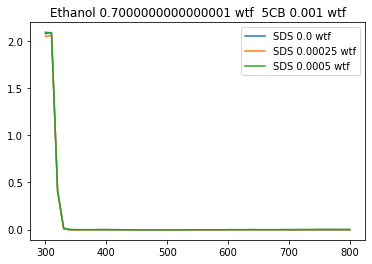

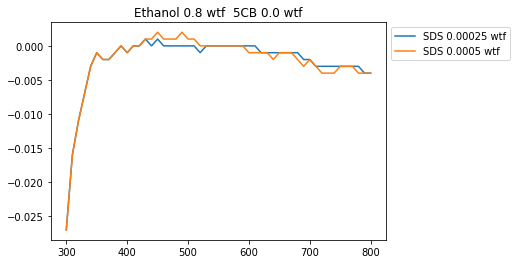

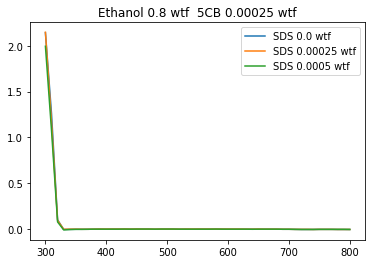

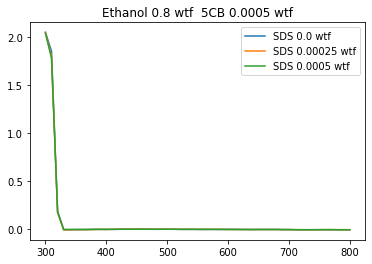

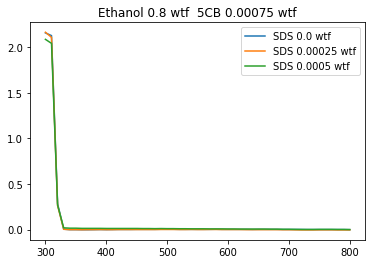

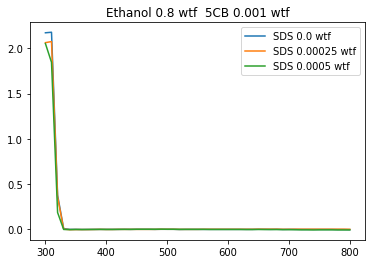

In [5]:
etoh_group = full_data.groupby('ethanol concentration wtf')

for etoh, group in etoh_group:
#     fig, ax = plt.subplots()
#     ax.set_title('Ethanol ' + str(etoh) + ' wtf')
    
    cb_group = group.groupby('5CB concentration wtf')
    for cb, group_cb in cb_group: 
        fig, ax = plt.subplots()
        ax.set_title('Ethanol ' + str(etoh) + ' wtf' + '  5CB ' + str(cb) + ' wtf')
        for i, row in group_cb.iterrows():
            spectra = list(row[wavelength_columns])
            sds_label = 'SDS ' + str(row['SDS concentration wtf']) + ' wtf'
            ax.plot(wavelengths, spectra, label = sds_label)
        ax.legend(bbox_to_anchor=(1, 1))

<ipython-input-6-bb3af1db0b7c>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


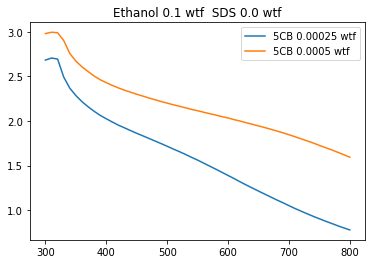

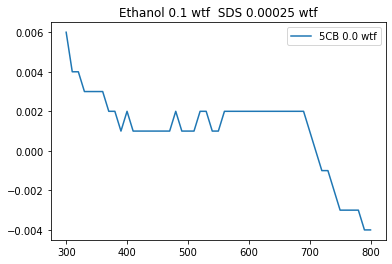

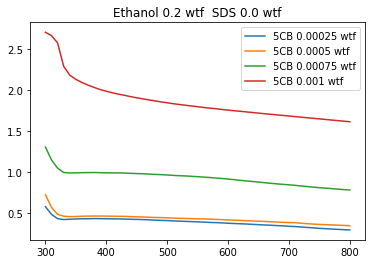

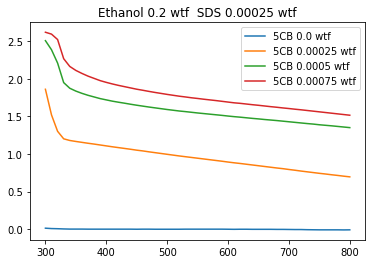

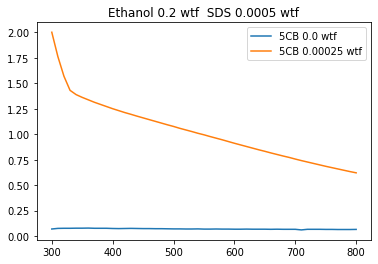

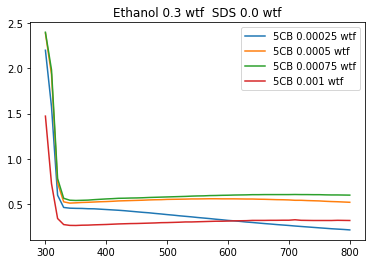

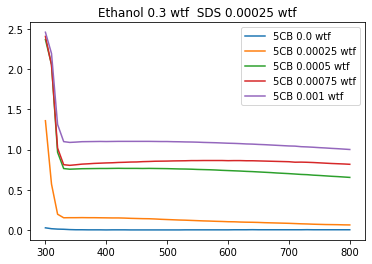

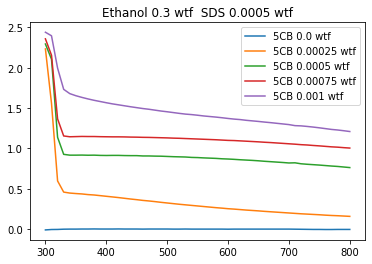

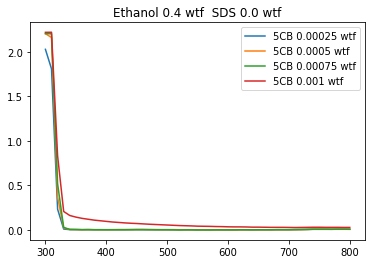

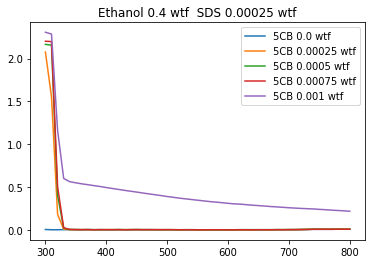

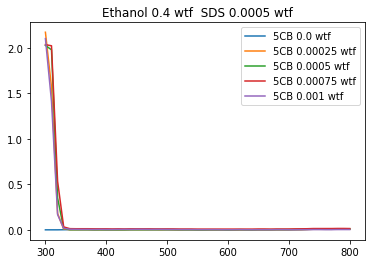

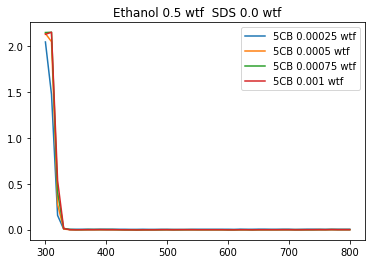

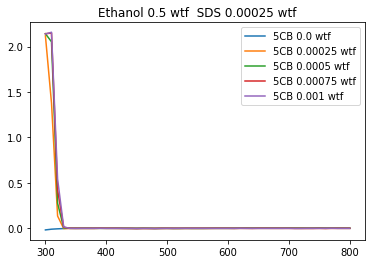

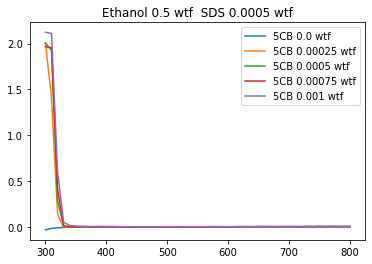

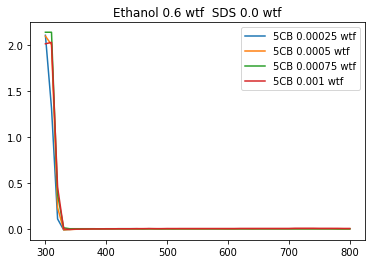

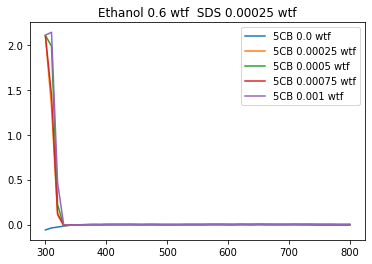

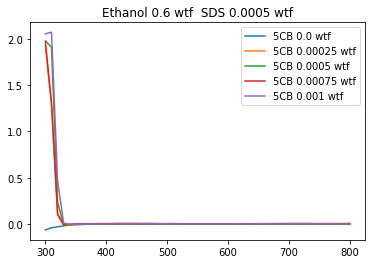

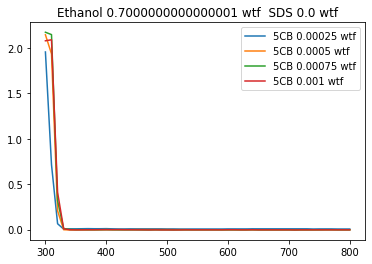

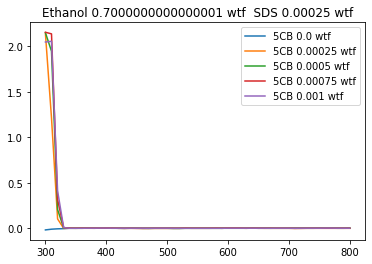

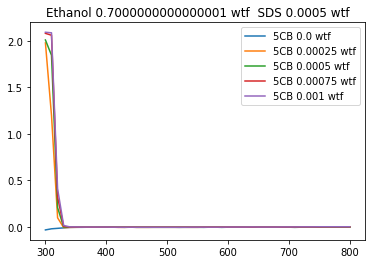

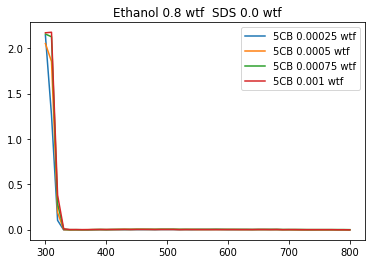

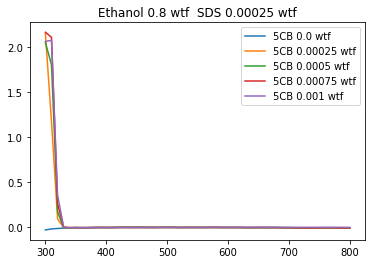

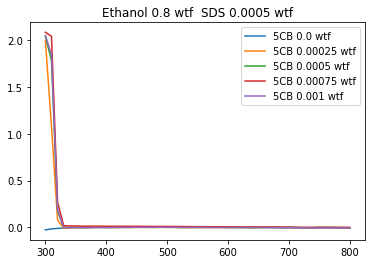

In [6]:
etoh_group = full_data.groupby('ethanol concentration wtf')

for etoh, group in etoh_group:
#     fig, ax = plt.subplots()
#     ax.set_title('Ethanol ' + str(etoh) + ' wtf')
    
    cb_group = group.groupby('SDS concentration wtf')
    for cb, group_cb in cb_group: 
        fig, ax = plt.subplots()
        ax.set_title('Ethanol ' + str(etoh) + ' wtf' + '  SDS ' + str(cb) + ' wtf')
        for i, row in group_cb.iterrows():
            spectra = list(row[wavelength_columns])
            sds_label = '5CB ' + str(row['5CB concentration wtf']) + ' wtf'
            ax.plot(wavelengths, spectra, label = sds_label)
        ax.legend(bbox_to_anchor=(1, 1))

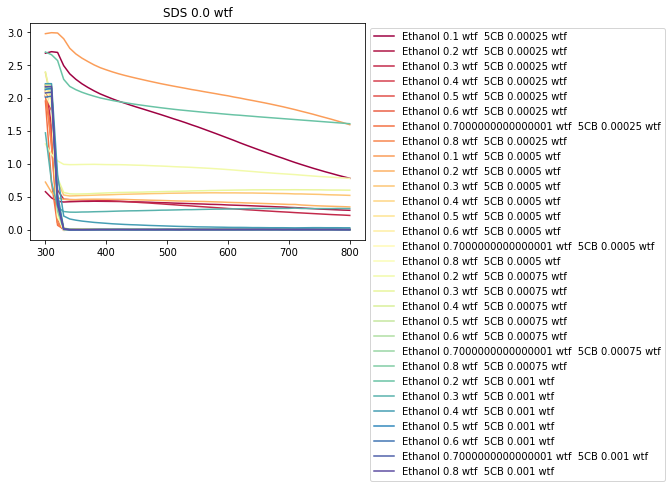

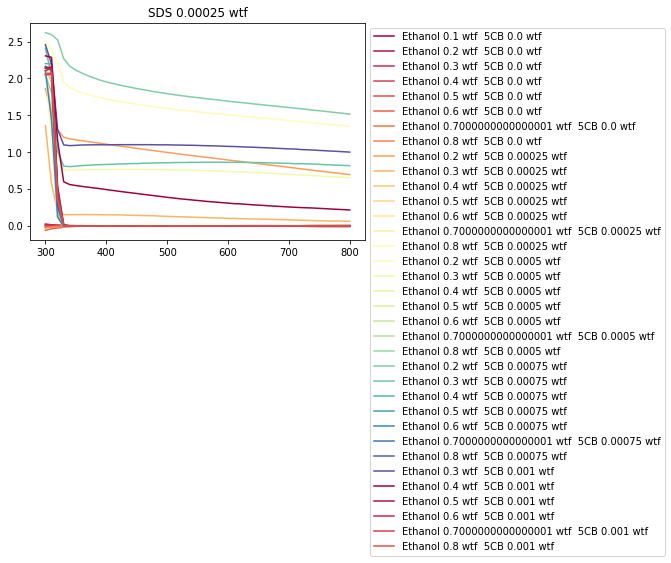

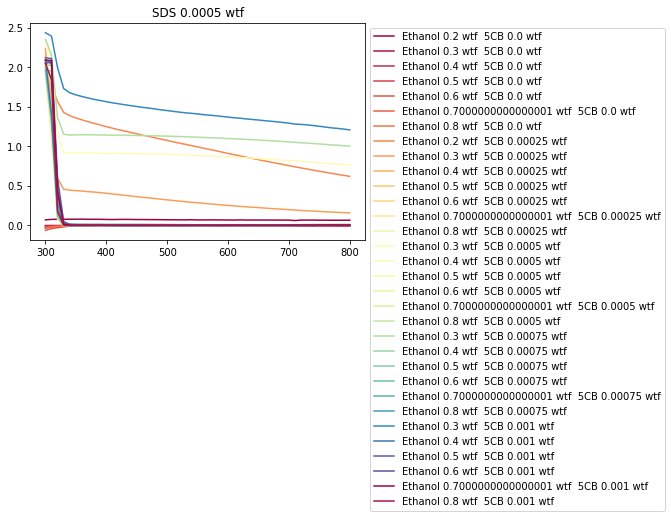

In [7]:
SDS_group = full_data.groupby('SDS concentration wtf')

for SDS, group in SDS_group:
    fig, ax = plt.subplots()
    ax.set_title('SDS ' + str(SDS) + ' wtf')
    ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
    for i, row in group.iterrows():
        # add subtplots so that the only thing changing in a graph is the ethanol?
        spectra = list(row[wavelength_columns])
        sds_label = 'Ethanol ' + str(row['ethanol concentration wtf']) + ' wtf' + '  5CB ' + str(row['5CB concentration wtf']) + ' wtf'
        ax.plot(wavelengths, spectra, label = sds_label)
    ax.legend(bbox_to_anchor=(1, 1))